## Lecture 3 - Logistic Regression
![Course Logo](./Images/Course Logo.PNG)

In [15]:
from IPython.display import Image
from IPython.display import display
display(Image(url='./Images/Logistic Regression.gif'))

![](Images/malignant 2.PNG)

![](Images/malignant3.PNG)

![](Images/from regression to classification.PNG)

![](Images/LR Note.PNG)

![Death Note or Logistic Regression.gif](Images/Death Note or Logistic Regression.gif)

![Sigmoid Logo.png](Images/Sigmoid Logo.png)

![](Images/Sigmoid Function.gif)

Logistic regression uses an equation as the representation, similar to linear regression. The central premise of Logistic Regression is the assumption that your input space can be separated into two nice ‘regions’, one for each class, by a linear(read: straight) boundary. Your data must be linearly seperable in n dimensions

![alt text](Images/linearly_separable_4.png)

So if we had the following function

![alt text](Images/latex.png)

Given some point (a,b), if we plugged it in, the equation could output a positive result (for one class), negative result (for the other class), or 0 (the point lies right on the decision boundary).

![](Images/logistic-regression-1-feature.png)

![logistic regression-probability.PNG](Images/logistic regression-probability.PNG)

![](Images/logistic regression-2 classes.PNG)

![logistic regression-decision boundary.png](Images/logistic regression-decision boundary.png)

![logistic regression cost function 1.PNG](Images/logistic regression cost function 1.PNG)

![logistic regression non-convex cauz of sigmoid.PNG](Images/logistic regression non-convex cauz of sigmoid.PNG)

Maximum Likelihood Estimator
![Maximum Likelihood Estimation 4.PNG](Images/Maximum Likelihood Estimation 4.PNG)

![](Images/logistic regression steps.PNG)

![](Images/derivative proof1.PNG)
![](Images/derivative proof2.PNG)

In [16]:
# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

![buy a car online.jpg](Images/buy a car online.jpg)

In [17]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [18]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Aurora\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [21]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

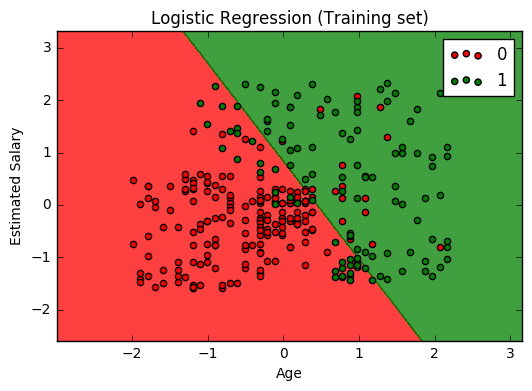

In [24]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

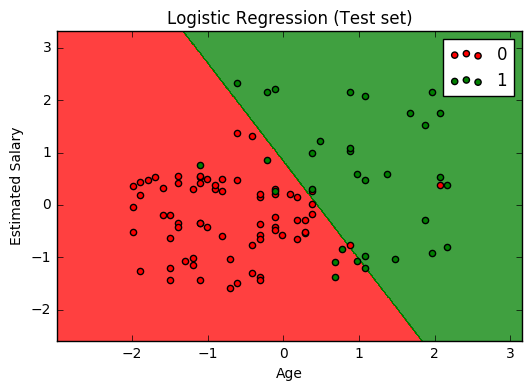

In [25]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
